In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

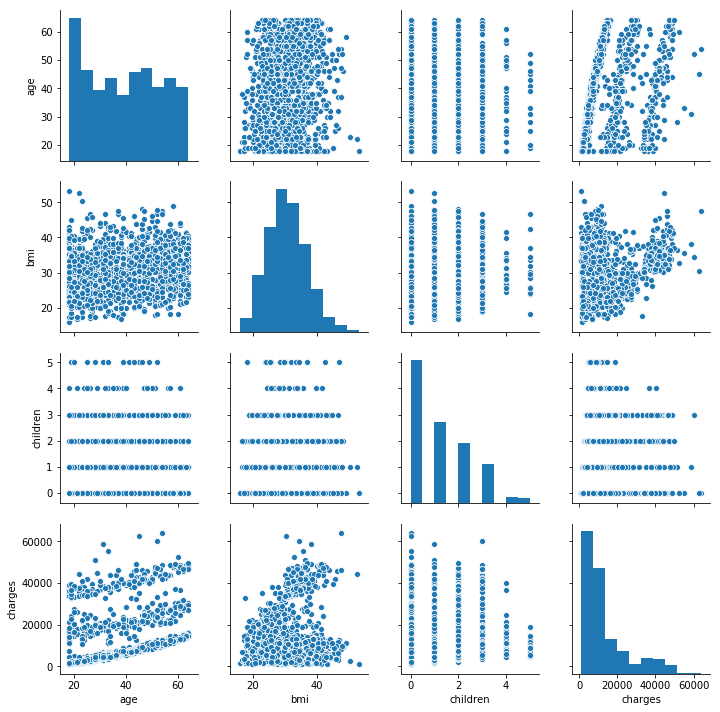

In [18]:
sns.pairplot(data,palette='Dark1')

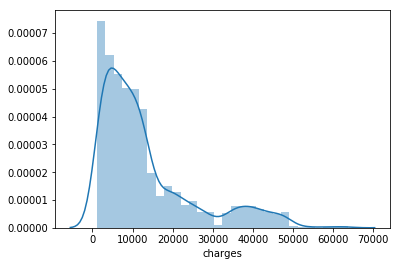

In [21]:
sns.distplot(data['charges'])

In [8]:
x=data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [9]:
y=data['charges']

In [11]:
X=pd.get_dummies(x,drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print(lm.intercept_)

-12588.72169654751


In [29]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coeffient'])
coeff_df

,Coeffient
age,258.205515
bmi,358.173352
children,459.530749
sex_male,65.547015
smoker_yes,24000.462821
region_northwest,-350.628410
region_southeast,-1434.466665
region_southwest,-800.908342


In [30]:
pred=lm.predict(X_test)

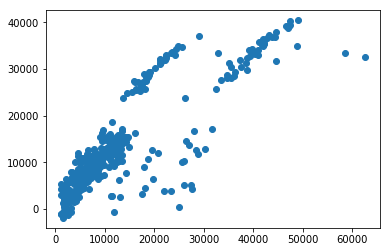

In [33]:

plt.scatter(y_test,pred)

C:\Users\HP\Anaconda3\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


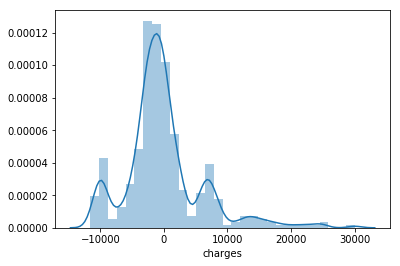

In [34]:
sns.distplot((y_test-pred),bins=30)

In [35]:
from sklearn import metrics

In [41]:
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))


MAE : 4228.406100458034
MSE : 38291691.73540171
